<a href="https://colab.research.google.com/github/PrinceChauhanhub/Customer-Churn-Prediction/blob/main/Churn_Prediction_of_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Bootcamp/Project: Customer Churn Predictions/Telco Customer Churn Data.csv')

In [ ]:
# Top 5 data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Understanding the data

Total Features - 21

Independent Features - 20 : customerID, gender, SeniorCitizen, Partner ,Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges.

Dependent Features  - Churn (A customer can churn or not)

Checking the datatype of each columns to understand the data

In [ ]:
data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


There are total 18 Categorical values

Checking for Missing Values

In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


There are no null values present in the dataset

We can se that Total Charges feature contains numerical value but its data type is categorical so we convert it to numeric value.

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Total Charges contains 11 Null values

Removing those null values

In [ ]:
data.shape

(7043, 21)

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
data.shape

(7032, 21)

Analysing data more precisely

In [ ]:
data.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

Removing the CustomerID because there is no use of it

In [ ]:
data = data.drop(columns = ['customerID'],axis = 1)

Shape of the data

In [ ]:
data.shape

(7032, 20)

records - 7043

columns - 20 + 1 (Target Column)

# Univariant Analysis

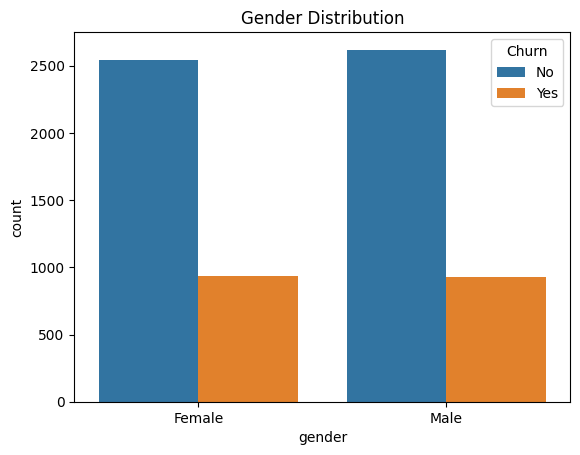

In [ ]:
sns.countplot(data=data, x='gender',hue = 'Churn')
plt.title('Gender Distribution')
plt.show()

The Gender feature doesn't affet the churn so we can remove it.

In [ ]:
X = data.drop(columns = ['Churn'],axis = 1)
y = data['Churn']

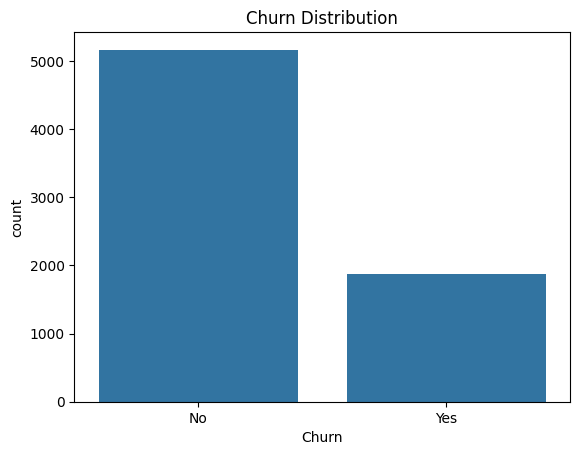

In [ ]:
sns.countplot(data=data, x='Churn')
plt.title('Churn Distribution')
plt.show()

In [ ]:
data.drop(columns = 'gender',axis = 1,inplace = True)

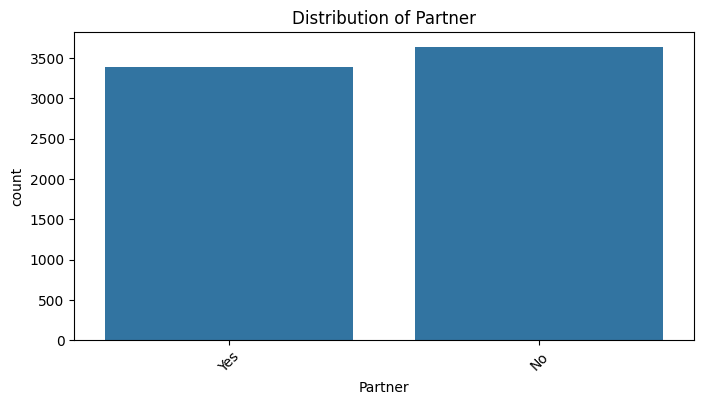

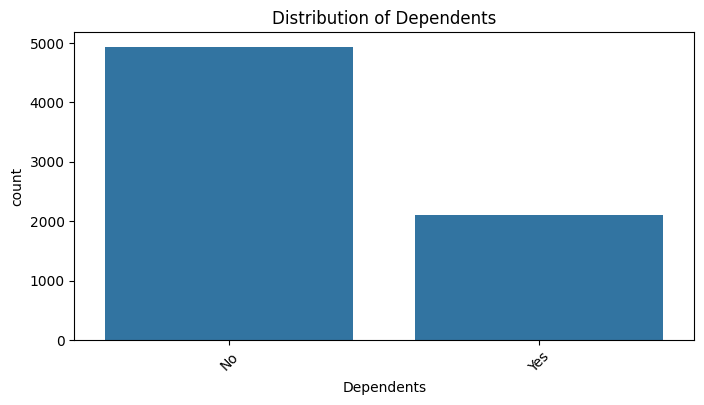

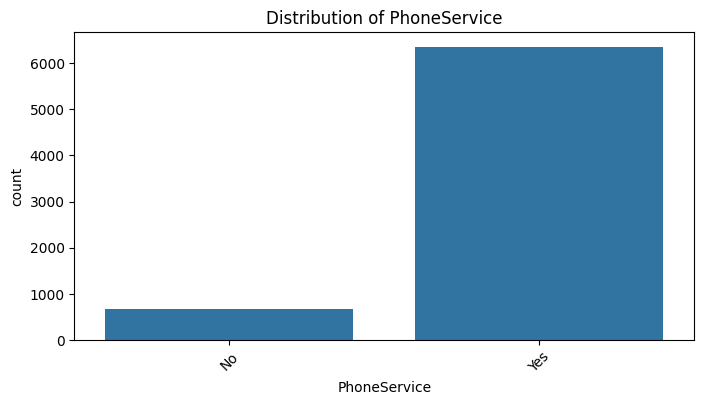

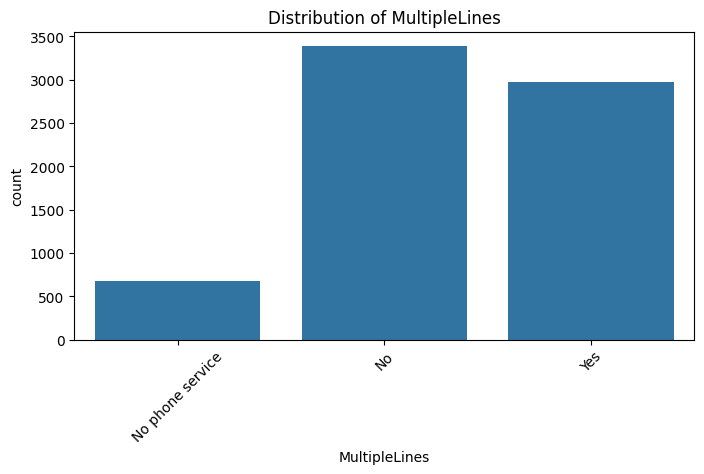

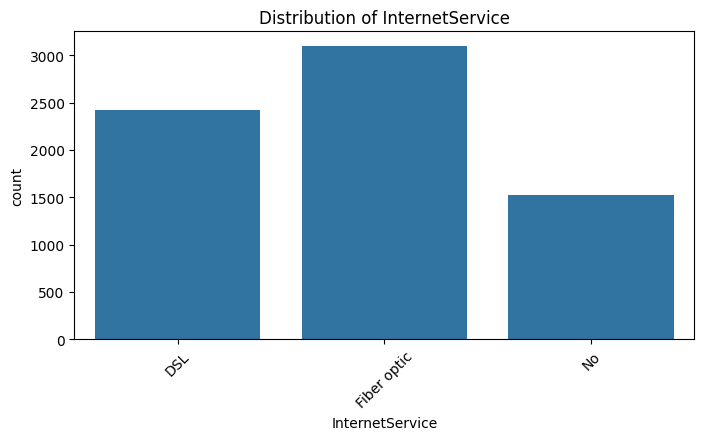

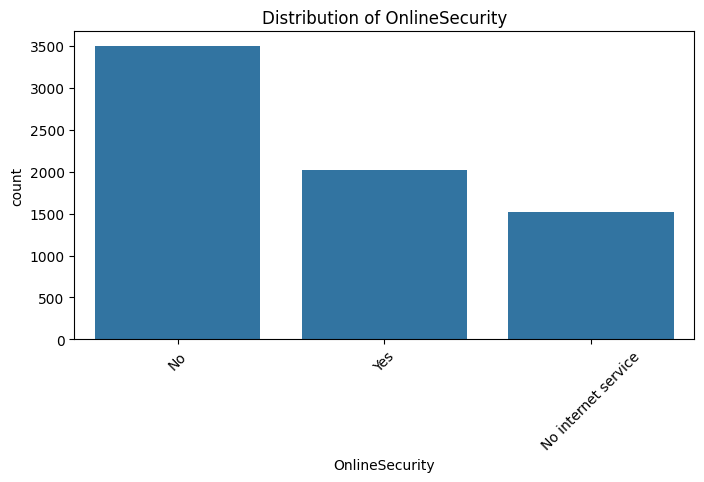

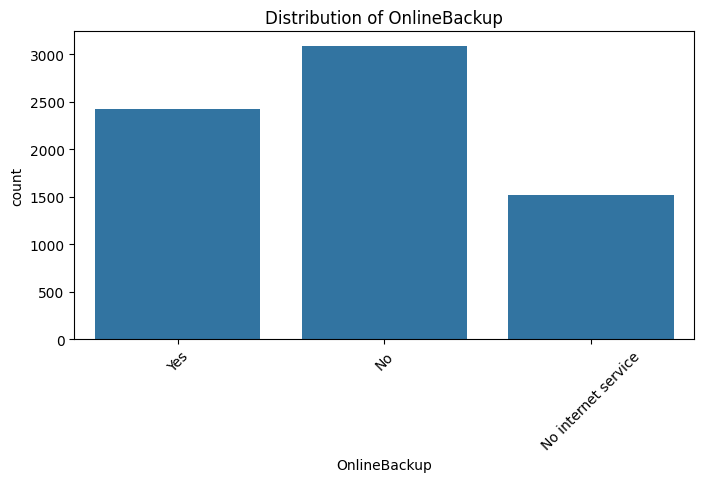

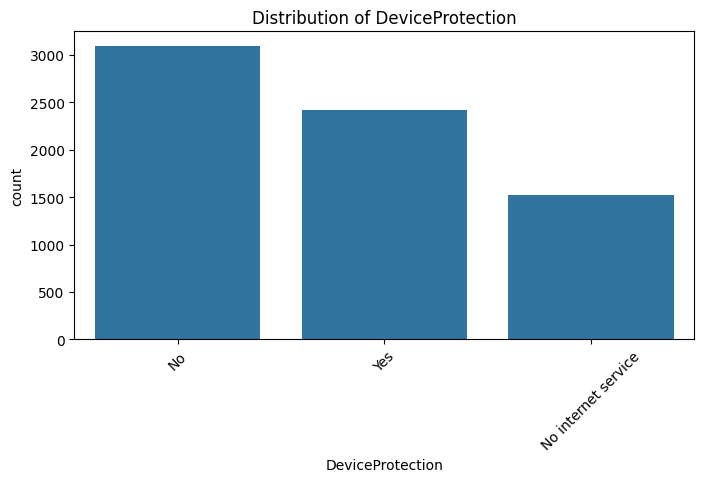

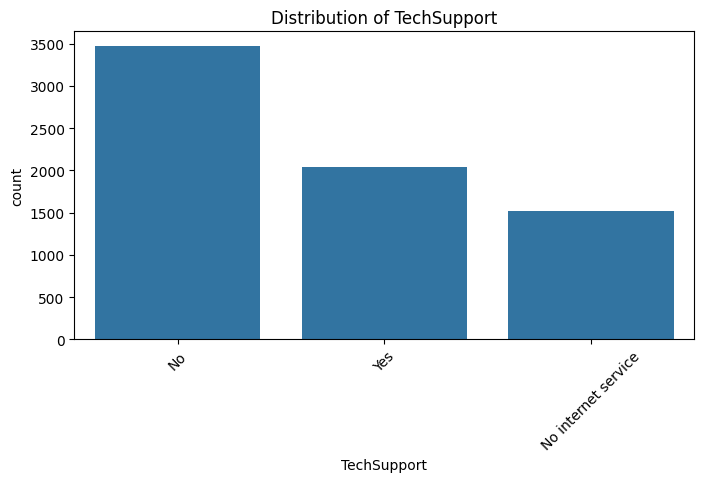

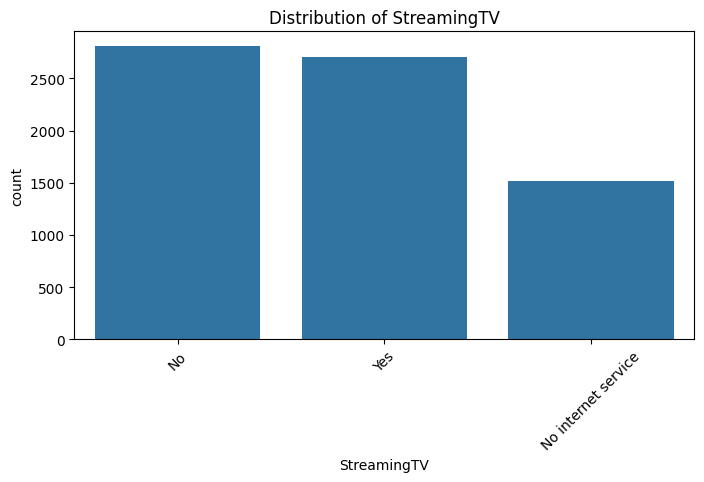

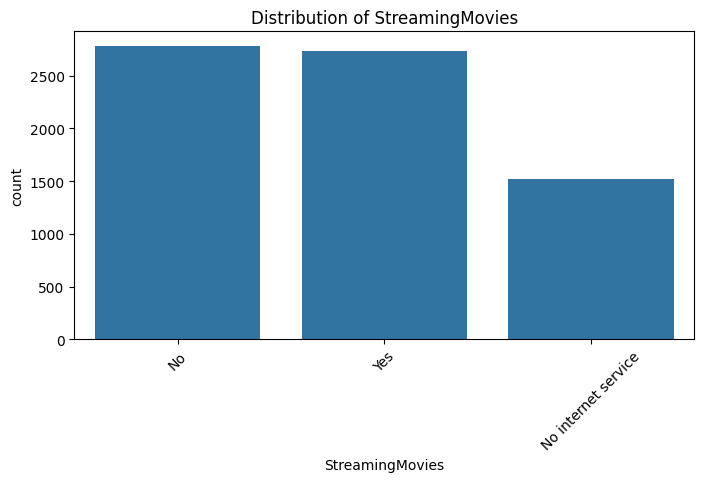

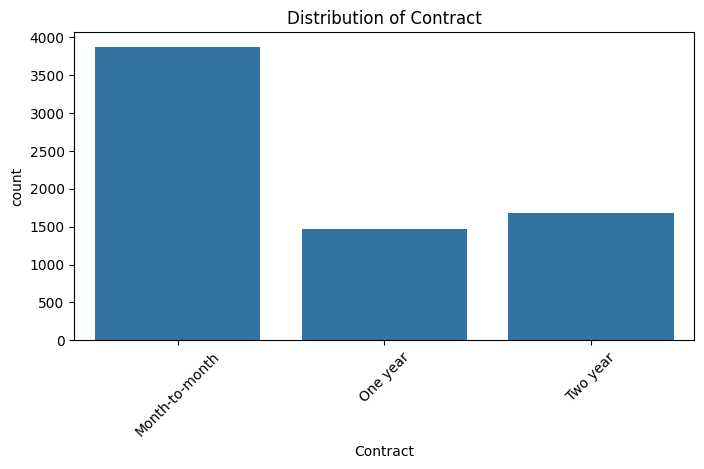

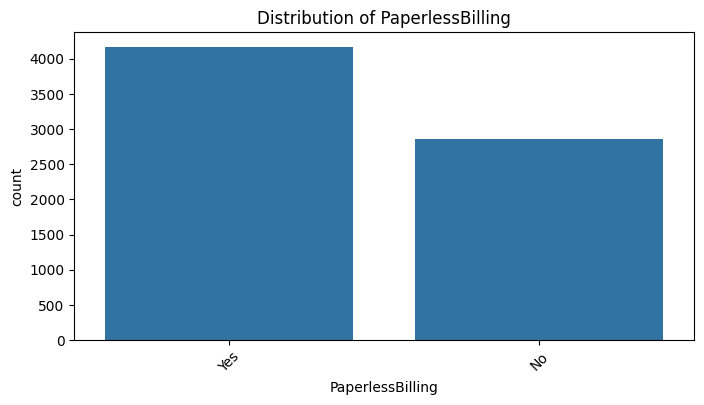

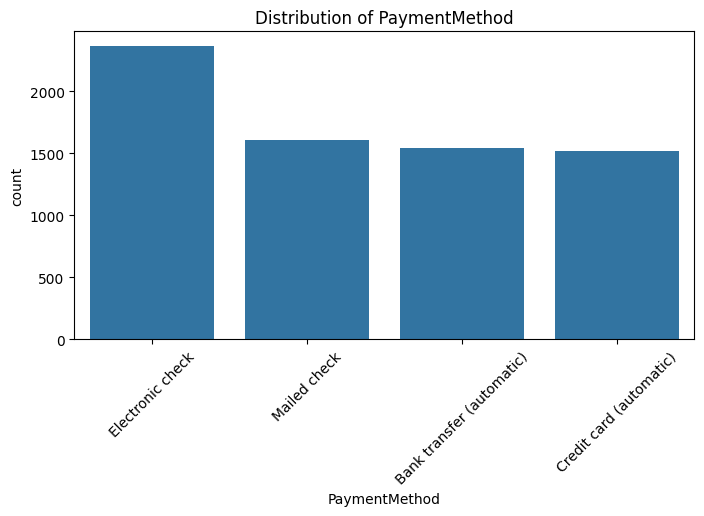

In [ ]:
# Distribution Of Categorical Columns
categorical_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Bivariant Analysis

**Categorical Columns Vs Churn**

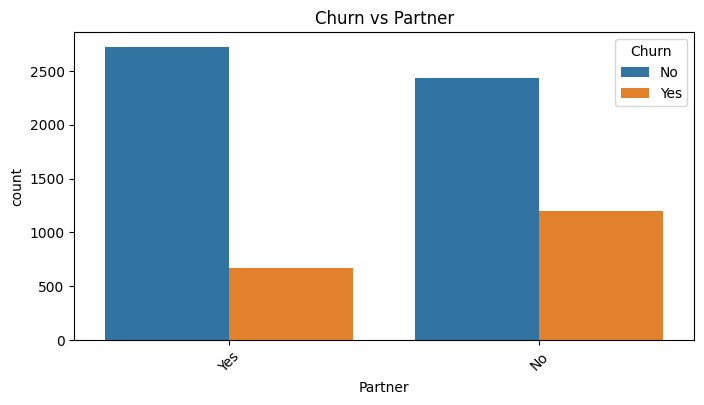

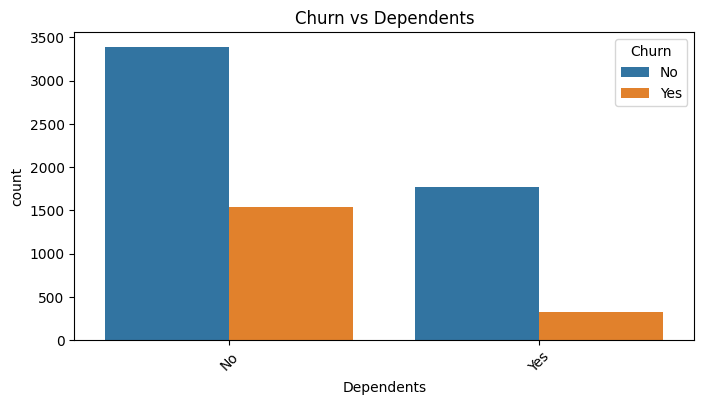

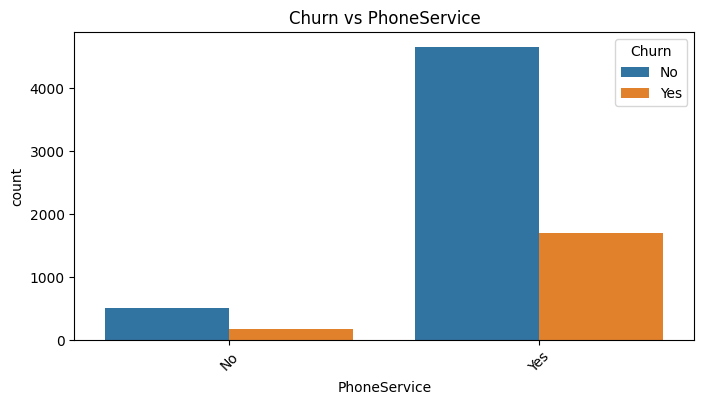

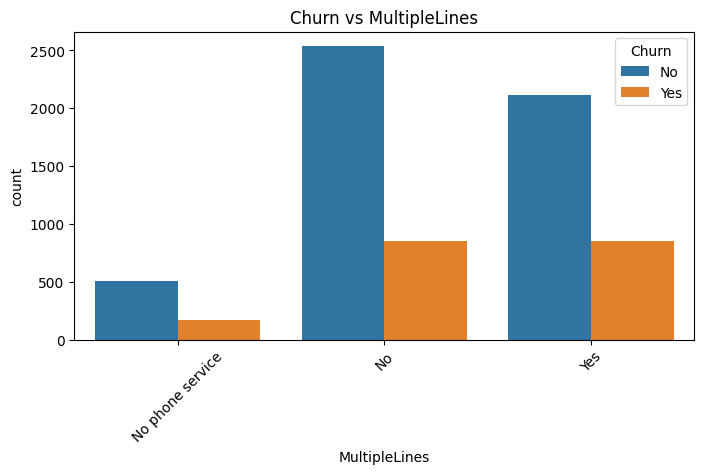

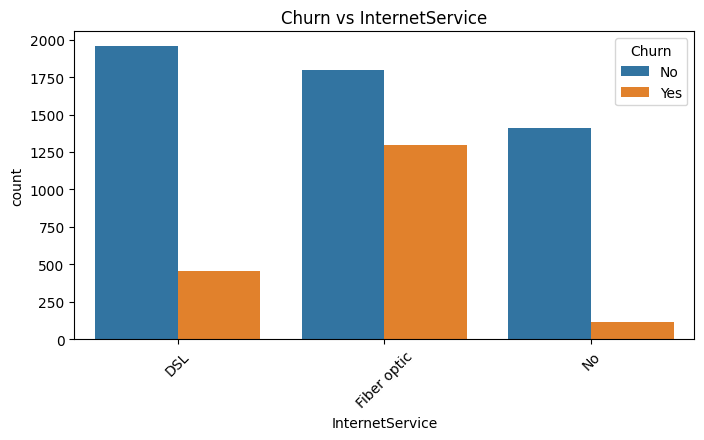

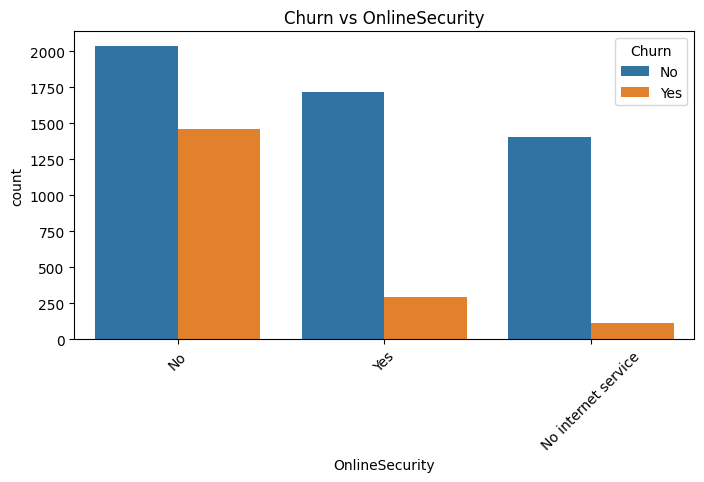

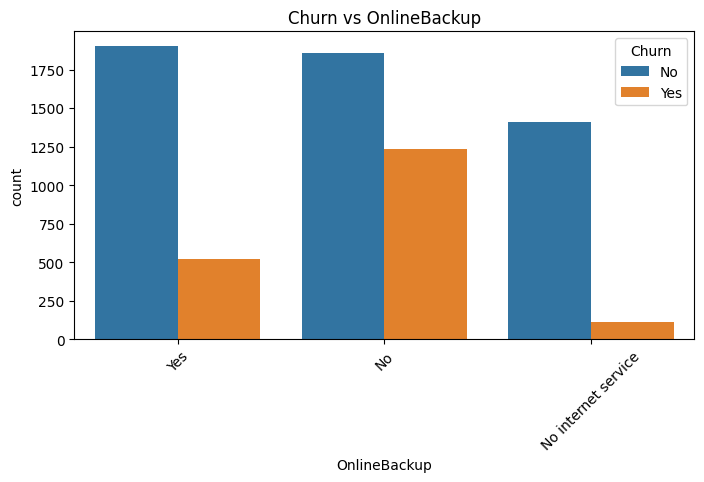

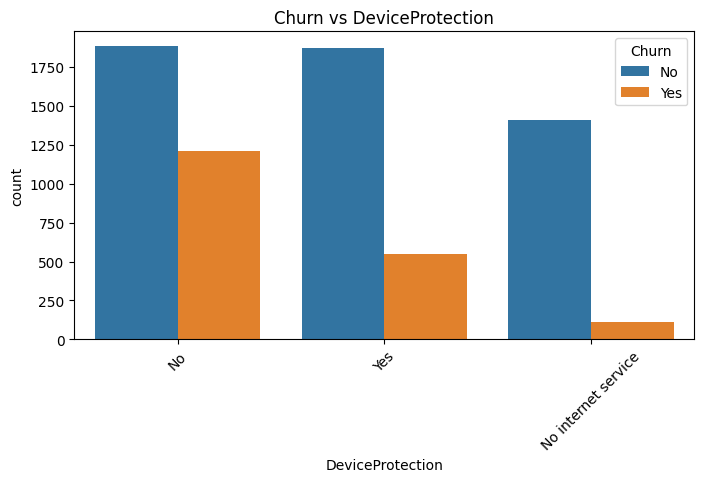

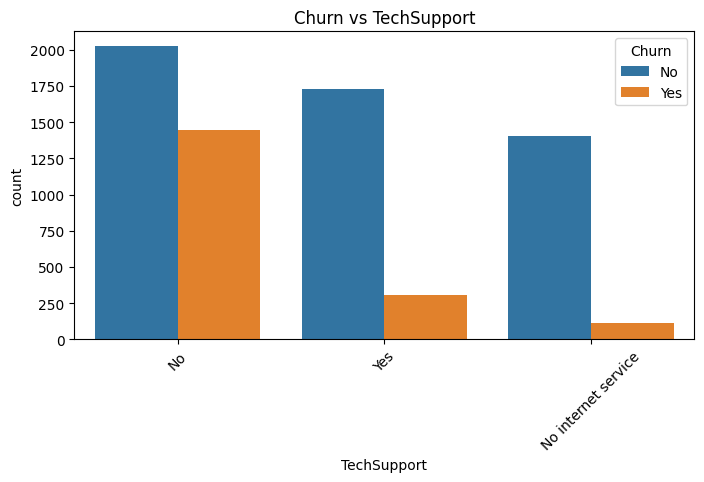

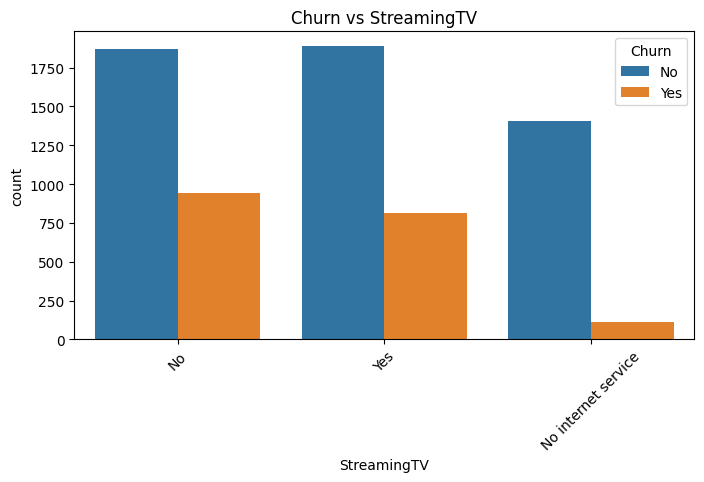

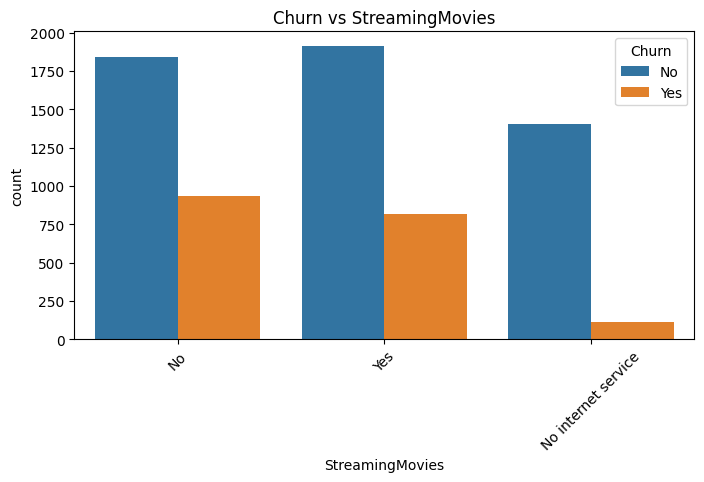

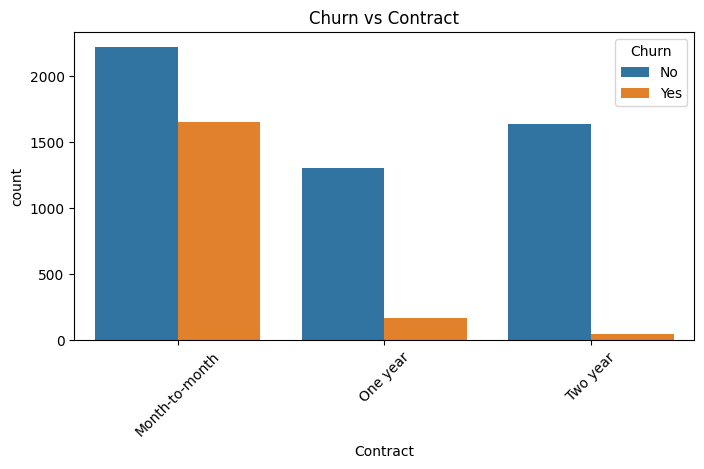

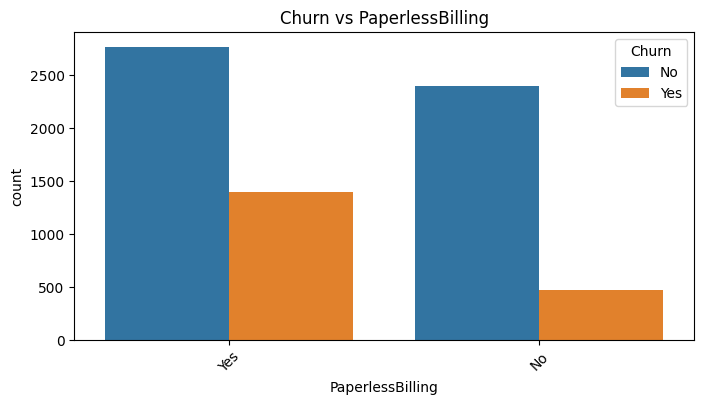

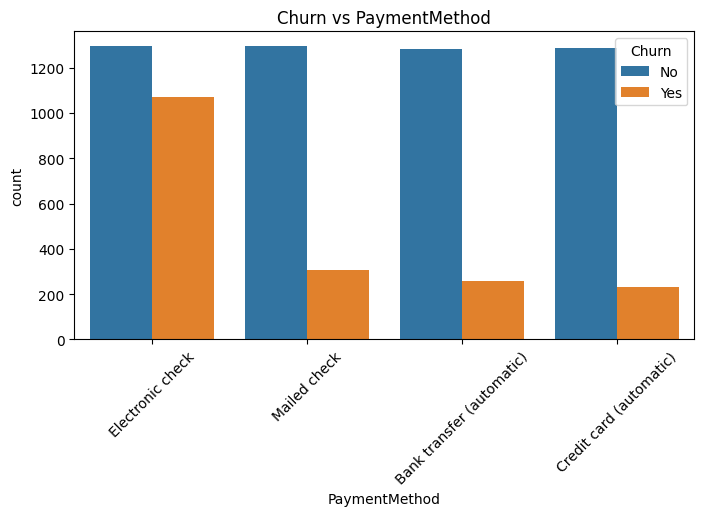

In [ ]:
# Plot churn vs categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=data, x=col, hue='Churn')
    plt.title(f'Churn vs {col}')
    plt.xticks(rotation=45)
    plt.show()


**Numerical Columns VS Churn**

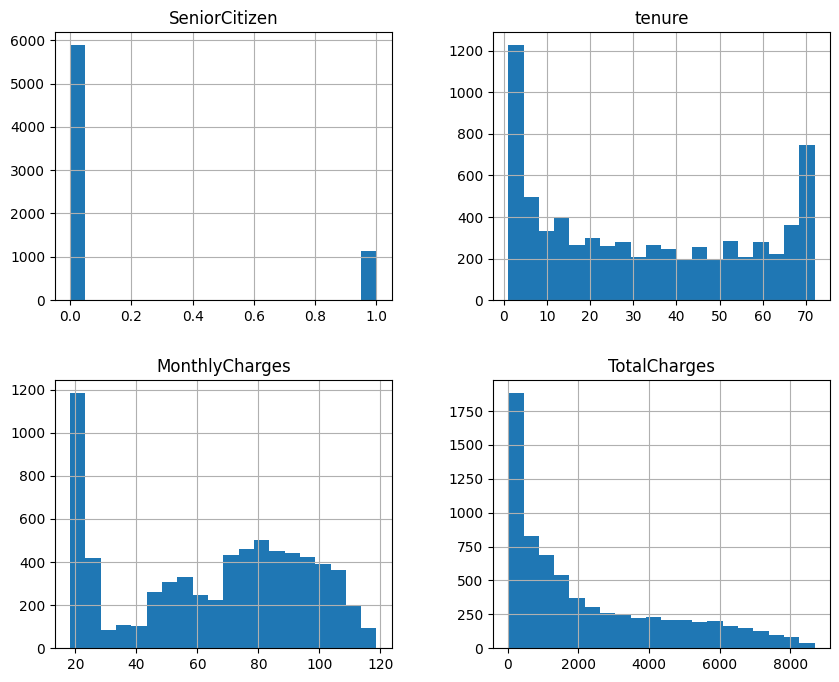

In [ ]:
# Plot distribution of numeric columns
numeric_cols = ['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']
data[numeric_cols].hist(bins=20, figsize=(10,8))
plt.show()


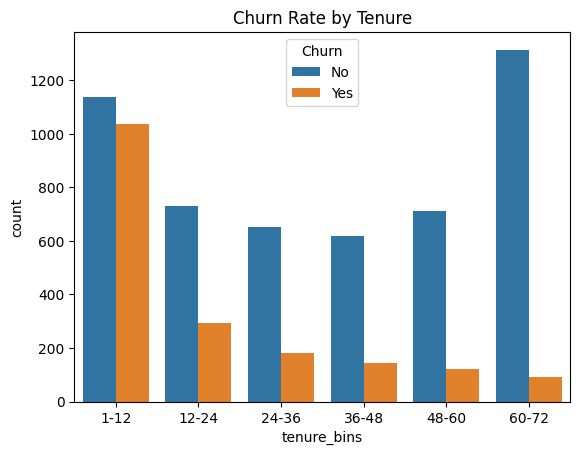

In [ ]:
#Churn Rate Based on Tenure
# Create bins for tenure
data['tenure_bins'] = pd.cut(data['tenure'], bins=[0, 12, 24, 36, 48, 60, 72],
                           labels=['1-12', '12-24', '24-36', '36-48', '48-60','60-72'])

# Churn rate for tenure groups
sns.countplot(data=data, x='tenure_bins', hue='Churn')
plt.title('Churn Rate by Tenure')
plt.show()


In [ ]:
data.corr(numeric_only = True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


Using HeatMap to Understand the Correlation more precisely

[]

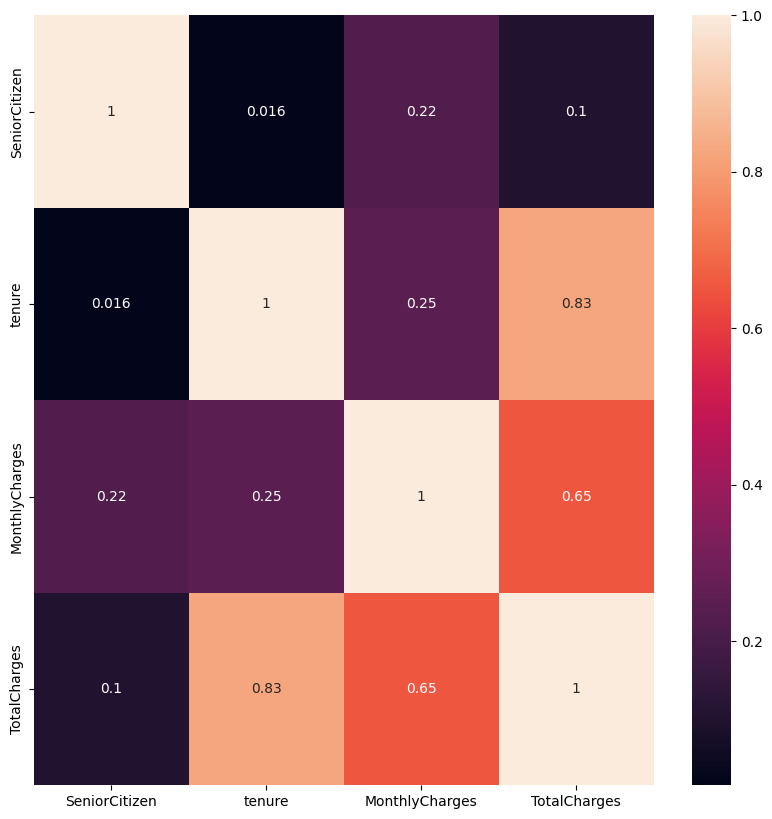

In [ ]:
plt.figure(figsize = (10,10)) # removed annot = True
sns.heatmap(data.corr(numeric_only = True),annot = True)
plt.plot()

There are no two features which are highly corelated it means every feature is important.

Checking Descriptive Stats of the data

1 - For Numerical Data

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


2 -For Categorical data

In [ ]:
data.describe(include = 'object').T

,count,unique,top,freq
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094
TechSupport,7032,3,No,3472
StreamingTV,7032,3,No,2809


Checking for Outliers

BOX Plot

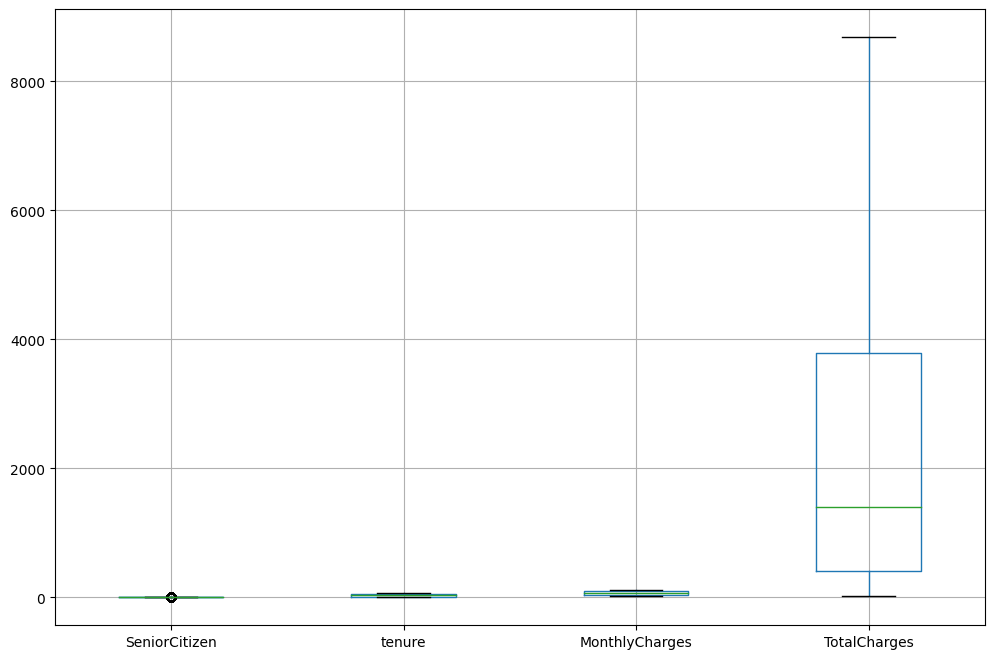

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
data.boxplot(ax=ax) # Removed the data argument. The DataFrame is implicitly used as data
plt.show()

No Outier Detected

To Apply One hot Encoding we need to first convert Object datatype to Categorical datatype

In [ ]:
columns=['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [ ]:
for col in columns:
  data[col] = data[col].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SeniorCitizen     7032 non-null   int64   
 1   Partner           7032 non-null   category
 2   Dependents        7032 non-null   category
 3   tenure            7032 non-null   int64   
 4   PhoneService      7032 non-null   category
 5   MultipleLines     7032 non-null   category
 6   InternetService   7032 non-null   category
 7   OnlineSecurity    7032 non-null   category
 8   OnlineBackup      7032 non-null   category
 9   DeviceProtection  7032 non-null   category
 10  TechSupport       7032 non-null   category
 11  StreamingTV       7032 non-null   category
 12  StreamingMovies   7032 non-null   category
 13  Contract          7032 non-null   category
 14  PaperlessBilling  7032 non-null   category
 15  PaymentMethod     7032 non-null   category
 16  MonthlyCharges    7032 non-nu

In [ ]:
df = pd.get_dummies(data, drop_first = True)
df.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure_bins_12-24,tenure_bins_24-36,tenure_bins_36-48,tenure_bins_48-60,tenure_bins_60-72
0,0,1,29.85,29.85,True,False,False,True,False,False,...,True,False,True,False,False,False,False,False,False,False
1,0,34,56.95,1889.50,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,2,53.85,108.15,False,False,True,False,False,False,...,True,False,False,True,True,False,False,False,False,False
3,0,45,42.30,1840.75,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,2,70.70,151.65,False,False,True,False,False,True,...,True,False,True,False,True,False,False,False,False,False


In [ ]:
df.shape

(7032, 35)

Scaling of the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [ ]:
df.head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure_bins_12-24,tenure_bins_24-36,tenure_bins_36-48,tenure_bins_48-60,tenure_bins_60-72
0,0,-1.280248,-1.161694,-0.994194,True,False,False,True,False,False,...,True,False,True,False,False,False,False,False,False,False
1,0,0.064303,-0.260878,-0.173740,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,-1.239504,-0.363923,-0.959649,False,False,True,False,False,False,...,True,False,False,True,True,False,False,False,False,False
3,0,0.512486,-0.747850,-0.195248,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,-1.239504,0.196178,-0.940457,False,False,True,False,False,True,...,True,False,True,False,True,False,False,False,False,False
5,0,-0.995040,1.158489,-0.645369,False,False,True,False,True,True,...,True,False,True,False,True,False,False,False,False,False
6,0,-0.424625,0.807802,-0.147313,False,True,True,False,True,True,...,True,True,False,False,False,True,False,False,False,False
7,0,-0.913552,-1.165018,-0.874169,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
8,0,-0.180161,1.329677,0.336516,True,False,True,False,True,True,...,True,False,True,False,True,False,True,False,False,False
9,0,1.205134,-0.287470,0.531476,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7.032000e+03,7.032000e+03,7.032000e+03
mean,0.162400,-1.126643e-16,6.062651e-17,-1.119064e-16
std,0.368844,1.000071e+00,1.000071e+00,1.000071e+00
min,0.000000,-1.280248e+00,-1.547283e+00,-9.990692e-01
25%,0.000000,-9.542963e-01,-9.709769e-01,-8.302488e-01
50%,0.000000,-1.394171e-01,1.845440e-01,-3.908151e-01
75%,0.000000,9.199259e-01,8.331482e-01,6.668271e-01
max,1.000000,1.612573e+00,1.793381e+00,2.824261e+00


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Churn_Yes'],axis = 1)
y = df['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)



**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
models = {
    'Logistic':LogisticRegression,
    'Decision Tree':DecisionTreeClassifier,
    'SVM':SVC,
    'KNN':KNeighborsClassifier,
    'Random Forest':RandomForestClassifier,
    'Gradient Boosting':GradientBoostingClassifier

}

In [ ]:
results = []
for model_name, model in models.items():
    # Create an instance of the model
    model = model()

    # Fit model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic,0.787491,0.632509,0.478610,0.544901
1,Decision Tree,0.726368,0.486216,0.518717,0.501940
2,SVM,0.791756,0.665306,0.435829,0.526656
3,KNN,0.754087,0.541667,0.486631,0.512676
4,Random Forest,0.786070,0.634686,0.459893,0.533333
5,Gradient Boosting,0.797441,0.657244,0.497326,0.566210


In [ ]:
df['Churn_Yes'].value_counts()

,count
Churn_Yes,
False,5163
True,1869


data is highly imbalanced applying Smoteenn

In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [ ]:
df['Churn_Yes'].value_counts()

,count
Churn_Yes,
False,5163
True,1869


In [ ]:
results = []
for model_name, model in models.items():
    # Create an instance of the model
    model = model()

    # Fit model
    model.fit(X_resampled, y_resampled)

    # Predict on the test set
    y_pred = model.predict(X_resampled)

    # Evaluate the model
    accuracy = accuracy_score(y_resampled, y_pred)
    precision = precision_score(y_resampled, y_pred)
    recall = recall_score(y_resampled, y_pred)
    f1 = f1_score(y_resampled, y_pred)
    confusion = confusion_matrix(y_resampled, y_pred)

    # Store the results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion': confusion
    })

# Create a DataFrame to display the results
results_df_resampled = pd.DataFrame(results)

In [ ]:
results_df_resampled

,Model,Accuracy,Precision,Recall,F1 Score,Confusion
0,Logistic,0.928463,0.936592,0.939073,0.937831,"[[2044, 192], [184, 2836]]"
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,"[[2236, 0], [0, 3020]]"
2,SVM,0.944635,0.951672,0.951987,0.951829,"[[2090, 146], [145, 2875]]"
3,KNN,0.970129,0.959846,0.989404,0.974401,"[[2111, 125], [32, 2988]]"
4,Random Forest,1.000000,1.000000,1.000000,1.000000,"[[2236, 0], [0, 3020]]"
5,Gradient Boosting,0.941591,0.946952,0.951656,0.949298,"[[2075, 161], [146, 2874]]"
